Perform the following operations using Python by creating student performance
dataset.
1. Display Missing Values
2. Replace missing values using any 2 suitable  
3. Identify outliers using  boxplot and scatterplot
4. Handle outlier using any technique
5. Perform any 2 data normalization technique

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
df = pd.read_csv('/content/Student.csv')
df

,Roll no.,Name,HSC per,FE per,SE per,TE per,BE per
0,1,sakshi nagare,94.0,88.0,89.0,90.0,91.0
1,2,tanuja navale,95.0,75.0,45.0,NaN,NaN
2,3,vishakha sainani,96.0,48.0,NaN,86.0,87.0
3,4,vaishanavi patil,97.0,85.0,77.0,55.0,54.0
4,5,samrudhi patil,85.0,NaN,NaN,NaN,54.0
5,6,samiksha patil,89.0,99.0,NaN,85.0,NaN
6,7,kadambari shaha,NaN,77.0,55.0,86.0,55.0
7,8,jayesh shaha,47.0,NaN,65.0,87.0,56.0
8,9,srshti borhade,85.0,85.0,NaN,88.0,NaN
9,10,utkarsh nagare,65.0,NaN,78.0,89.0,77.0


In [30]:
#1
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Roll no.    0
Name        0
HSC per     2
FE per      4
SE per      5
TE per      3
BE per      4
dtype: int64


In [31]:
#2
hsc_median = df['HSC per'].median()
df['HSC per'].fillna(hsc_median, inplace=True)

In [32]:
fe_median = df['FE per'].median()
df['FE per'].fillna(fe_median, inplace=True)

In [33]:
se_median = df['SE per'].median()
df['SE per'].fillna(se_median, inplace=True)

In [34]:
te_mean = df['TE per'].mean()
df['TE per'].fillna(te_mean, inplace=True)

In [35]:
be_mean = df['BE per'].mean()
df['BE per'].fillna(be_mean, inplace=True)

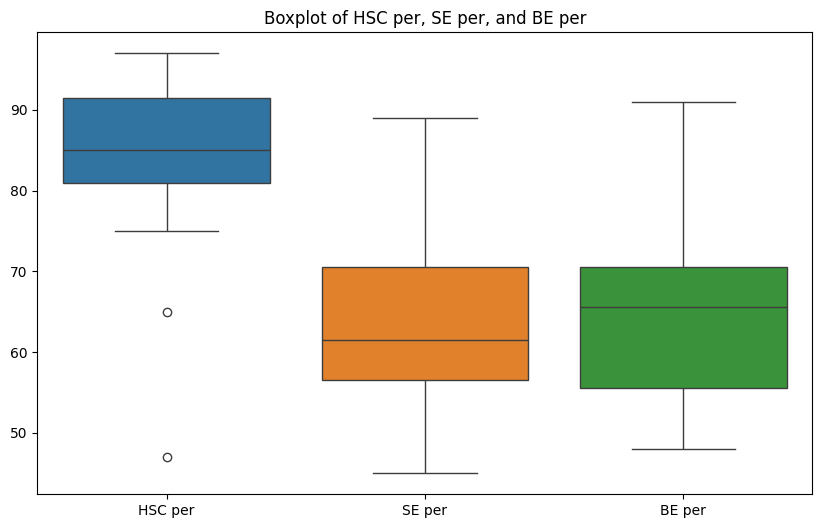

In [36]:
#3
# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['HSC per', 'SE per', 'BE per']])
plt.title('Boxplot of HSC per, SE per, and BE per')
plt.show()

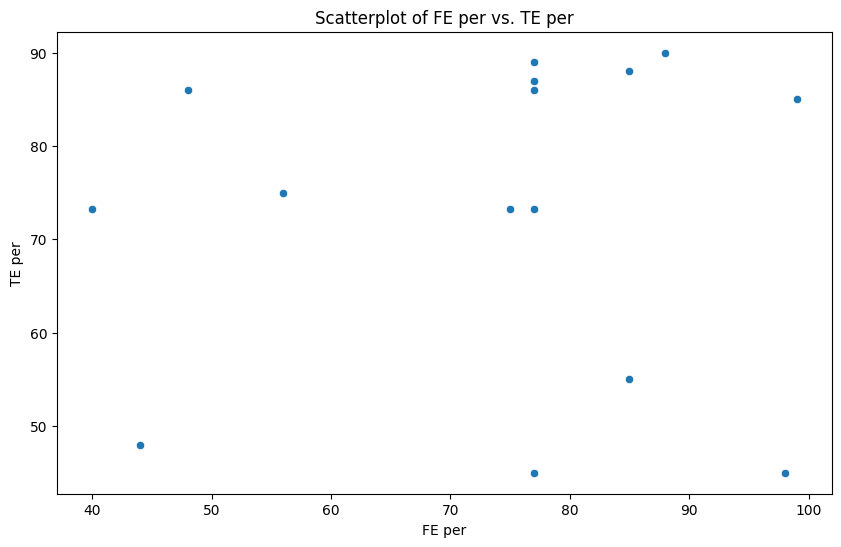

In [37]:
# Scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='FE per', y='TE per', data=df)
plt.title('Scatterplot of FE per vs. TE per')
plt.show()

In [38]:
#4
from scipy.stats.mstats import winsorize

In [39]:
df['FE per'] = winsorize(df['FE per'], limits=[0.05, 0.05])
df['TE per'] = winsorize(df['TE per'], limits=[0.05, 0.05])

In [40]:
#5
# Min-Max Normalization
df['HSC per'] = (df['HSC per'] - df['HSC per'].min()) / (df['HSC per'].max() - df['HSC per'].min())
df['FE per'] = (df['FE per'] - df['FE per'].min())/(df['FE per'].max() - df['FE per'].min())

In [41]:
# Z-score Normalization
df['SE per'] = (df['SE per'] - df['SE per'].mean()) / df['SE per'].std()
df['TE per'] = (df['TE per'] - df['TE per'].mean()) / df['TE per'].std()
df['BE per'] = (df['BE per'] - df['BE per'].mean()) / df['BE per'].std()

In [42]:
df

,Roll no.,Name,HSC per,FE per,SE per,TE per,BE per
0,1,sakshi nagare,0.94,0.813559,2.130327,0.994900,2.055611
1,2,tanuja navale,0.96,0.593220,-1.535946,0.000000,0.000000
2,3,vishakha sainani,0.98,0.135593,-0.161094,0.757312,1.732586
3,4,vaishanavi patil,1.00,0.762712,1.130434,-1.083995,-0.932366
4,5,samrudhi patil,0.76,0.627119,-0.161094,0.000000,-0.932366
5,6,samiksha patil,0.84,1.000000,-0.161094,0.697915,0.000000
6,7,kadambari shaha,0.76,0.627119,-0.702702,0.757312,-0.851610
7,8,jayesh shaha,0.00,0.627119,0.130542,0.816709,-0.770854
8,9,srshti borhade,0.76,0.762712,-0.161094,0.876106,0.000000
9,10,utkarsh nagare,0.36,0.627119,1.213758,0.935503,0.925025
